In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
rat_df =pd.read_csv('Datasets/ratings.csv')
gen_df =pd.read_csv('Datasets/plataformas.csv')

In [131]:
rat_df.info()
rat_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  int64  
 3   movieId    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 336.4+ MB


,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [132]:
gen_df["rating_y"].fillna(value=0, inplace=True)
gen_df["cast"].fillna(value="not registered", inplace=True)
gen_df["director"].fillna(value="not registered", inplace=True)
gen_df["country"].fillna(value="not registered", inplace=True)
gen_df["date_added"].fillna(value="not registered", inplace=True)
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       22998 non-null  object 
 4   cast           22998 non-null  object 
 5   country        22998 non-null  object 
 6   date_added     22998 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating_x       22998 non-null  object 
 9   duration       22516 non-null  object 
 10  listed_in      22998 non-null  object 
 11  description    22994 non-null  object 
 12  duration_int   22516 non-null  float64
 13  duration_type  22516 non-null  object 
 14  rating_y       22998 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 2.6+ MB


In [133]:
gen_df

,id,type,title,director,cast,country,date_added,release_year,rating_x,duration,listed_in,description,duration_int,duration_type,rating_y
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,113.0,min,3.467131
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,110.0,min,3.548682
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,74.0,min,3.500000
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",69.0,min,3.538055
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,45.0,min,3.478992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22993,ns8803,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,2019-11-20,2007,r,158 min,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a...",158.0,min,3.438998
22994,ns8804,tv show,zombie dumb,not registered,not registered,not registered,2019-07-01,2018,tv-y7,2 seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g...",2.0,season,3.515947
22995,ns8805,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,2019-11-01,2009,r,88 min,"comedies, horror movies",looking to survive in a world taken over by zo...,88.0,min,3.420945
22996,ns8806,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2020-01-11,2006,pg,88 min,"children & family movies, comedies","dragged from civilian life, a former superhero...",88.0,min,3.588050


In [134]:
df1 = gen_df[['id', 'title', 'director', 'type', 'cast', 'listed_in', 'rating_y']]
df1 =df1.rename(columns={"id":"movieId"})
df1 =df1.rename(columns={"rating_y":"score"})
df1 =df1.rename(columns={"listed_in":"genre"})
df1

,movieId,title,director,type,cast,genre,score
0,as1,the grand seduction,don mckellar,movie,"brendan gleeson, taylor kitsch, gordon pinsent","comedy, drama",3.467131
1,as2,take care good night,girish joshi,movie,"mahesh manjrekar, abhay mahajan, sachin khedekar","drama, international",3.548682
2,as3,secrets of deception,josh webber,movie,"tom sizemore, lorenzo lamas, robert lasardo, r...","action, drama, suspense",3.500000
3,as4,pink: staying true,sonia anderson,movie,"interviews with: pink, adele, beyoncé, britney...",documentary,3.538055
4,as5,monster maker,giles foster,movie,"harry dean stanton, kieran o'brien, george cos...","drama, fantasy",3.478992
...,...,...,...,...,...,...,...
22993,ns8803,zodiac,david fincher,movie,"mark ruffalo, jake gyllenhaal, robert downey j...","cult movies, dramas, thrillers",3.438998
22994,ns8804,zombie dumb,not registered,tv show,not registered,"kids' tv, korean tv shows, tv comedies",3.515947
22995,ns8805,zombieland,ruben fleischer,movie,"jesse eisenberg, woody harrelson, emma stone, ...","comedies, horror movies",3.420945
22996,ns8806,zoom,peter hewitt,movie,"tim allen, courteney cox, chevy chase, kate ma...","children & family movies, comedies",3.588050


In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movieId   22998 non-null  object 
 1   title     22998 non-null  object 
 2   director  22998 non-null  object 
 3   type      22998 non-null  object 
 4   cast      22998 non-null  object 
 5   genre     22998 non-null  object 
 6   score     22998 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.2+ MB


In [136]:
df2 = gen_df[['id', 'title', 'rating_y']]
df2 =df2.rename(columns={"id":"movieId"})
df2

,movieId,title,rating_y
0,as1,the grand seduction,3.467131
1,as2,take care good night,3.548682
2,as3,secrets of deception,3.500000
3,as4,pink: staying true,3.538055
4,as5,monster maker,3.478992
...,...,...,...
22993,ns8803,zodiac,3.438998
22994,ns8804,zombie dumb,3.515947
22995,ns8805,zombieland,3.420945
22996,ns8806,zoom,3.588050


In [137]:
df2.sort_values(by="rating_y", ascending=False, inplace=True)
df2

,movieId,title,rating_y
9626,as9627,thalaivii (telugu),3.724512
13289,hs2172,the man who killed hitler and then the bigfoot,3.717143
17390,ns3200,space jungle,3.709278
6057,as6058,garden of hedon,3.708140
12124,hs1007,the haunting in connecticut,3.703061
...,...,...,...
6650,as6651,diwan,3.352008
3719,as3720,"thomas & friends: the great race (us english, ...",3.348970
19012,ns4822,marvel's luke cage,3.344538
8124,as8125,k9 adventures - legend of the lost gold,3.341004


In [210]:
rdf=rat_df[['userId', 'rating', 'movieId']]
rdf
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   rating   float64
 2   movieId  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 252.3+ MB


In [139]:
df_title=gen_df[['id', 'title']]
df_title=df_title.rename(columns={"id":"movieId"})
df_title

,movieId,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker
...,...,...
22993,ns8803,zodiac
22994,ns8804,zombie dumb
22995,ns8805,zombieland
22996,ns8806,zoom


In [275]:
try1_df=pd.merge(rdf,df_title, right_on="movieId", left_on="movieId" , how='right')
try1_df.head()

,userId,rating,movieId,title
0,543,5.0,as1,the grand seduction
1,595,3.0,as1,the grand seduction
2,611,3.0,as1,the grand seduction
3,2523,3.5,as1,the grand seduction
4,3082,4.0,as1,the grand seduction


In [276]:
try1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11024289 entries, 0 to 11024288
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   rating   float64
 2   movieId  object 
 3   title    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 420.5+ MB


In [265]:
missing_title_rows = try1_df.loc[try1_df['title']]
#try1_df['title'] = np.where(try1_df['title'].str.contains('notitle'), np.nan, try1_df['title'])
#try1_df.dropna(subset=['title'], inplace=True)
#try1_df.info()
missing_title_rows.head()

KeyError: "None of [Index(['the english civil war', 'the english civil war',\n       'the english civil war', 'the english civil war',\n       'the english civil war', 'the english civil war',\n       'the english civil war', 'the english civil war',\n       'the english civil war', 'the english civil war',\n       ...\n       'power rangers dino fury', 'power rangers dino fury',\n       'power rangers dino fury', 'power rangers dino fury',\n       'power rangers dino fury', 'power rangers dino fury',\n       'power rangers dino fury', 'power rangers dino fury',\n       'power rangers dino fury', 'power rangers dino fury'],\n      dtype='object', length=11024289)] are in the [index]"

Analisis por usuario

In [143]:
# Usuarios únicos

print(len(rdf['userId'].unique()))

115077


In [144]:
# Calificaciones de películas por usuario

rdf_by_users = rdf.groupby(['userId']).count()
rdf_by_users.head()

,rating,movieId
userId,,
1,27,27
2,22,22
3,10,10
4,62,62
5,26,26


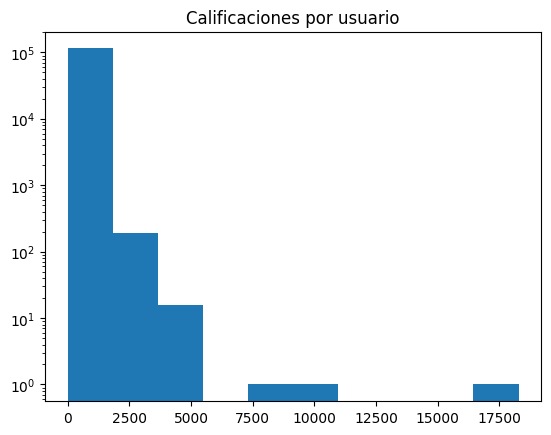

In [145]:
plt.hist(rdf_by_users.rating, log= True)
plt.title('Calificaciones por usuario')
plt.show()

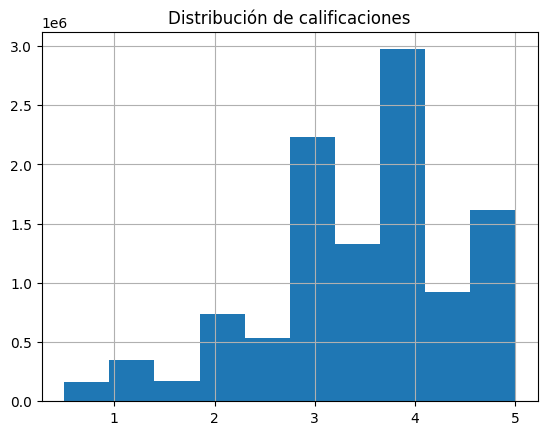

In [146]:
# Observamos la distribución de las calificaciones

rdf['rating'].hist()
plt.title('Distribución de calificaciones')
plt.show()

Analisis por pelicula

In [147]:
rdf_by_movies = try1_df[['movieId', 'userId', 'rating']]
rdf_by_movies = rdf_by_movies.groupby(['movieId']).count()
rdf_by_movies.head()

,userId,rating
movieId,,
as1,502,502
as10,513,513
as100,430,430
as1000,485,485
as1001,469,469


### **Películas por cantidad de calificaciones**

In [172]:
#Asumiendo que la persona que califica una pelicula la vio analizamos la cantidad de visualizaciones
rdf_by_movies = rdf.groupby(['movieId']).count()
rdf_by_movies.sort_values('userId', ascending = False, inplace = True)
rdf_by_movies['visualized_times'] = rdf_by_movies['userId']
rdf_by_movies.drop(columns = ['userId','rating'], inplace = True)
rdf_by_movies.head(10)

,visualized_times
movieId,
as4197,576
as9065,560
ns7279,558
as848,558
hs2360,556
as6998,556
as9469,556
as4889,554
hs582,554


In [171]:
df_title.head(3)

,movieId,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception


In [174]:
temp_by_movies = pd.merge(rdf_by_movies,df_title, on ="movieId")

In [175]:
print(temp_by_movies.columns)

Index(['movieId', 'visualized_times', 'title'], dtype='object')


In [165]:
temp_by_movies['title'] = df_title.loc[temp_by_movies.index].title

In [178]:
temp_by_movies['title'] = temp_by_movies['title'].fillna('no registered movie name')
temp_by_movies.head()

,movieId,visualized_times,title
0,as4197,576,from other worlds
1,as9065,560,the organization
2,ns7279,558,"leapfrog: sing-along, read-along"
3,as848,558,superbook
4,hs2360,556,dietland


In [179]:
print(temp_by_movies.columns)

Index(['movieId', 'visualized_times', 'title'], dtype='object')


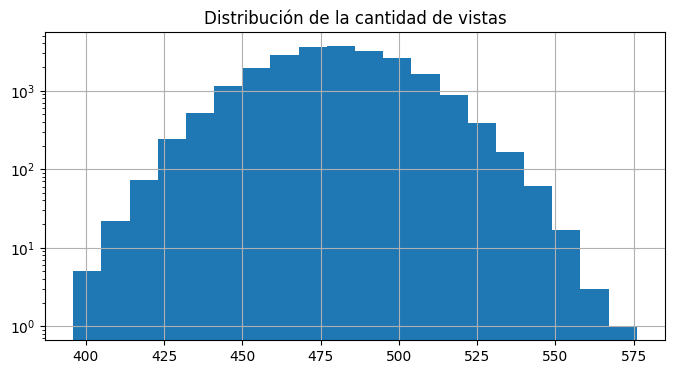

In [182]:
plt.figure(figsize=(8,4))
temp_by_movies[temp_by_movies.visualized_times < 600].visualized_times.hist(log=True, bins=20)
plt.title('Distribución de la cantidad de vistas')
plt.show()

In [309]:
umbral = 410
less_watchMask = temp_by_movies.visualized_times<umbral

In [310]:
less_watchedm = less_watchMask[less_watchMask].index.values
print(len(less_watchedm), less_watchedm)
type (less_watchedm)

16 [22982 22983 22984 22985 22986 22987 22988 22989 22990 22991 22992 22993
 22994 22995 22996 22997]


numpy.ndarray

In [311]:
TD_Mask = rdf.movieId.isin(less_watchedm)  #TrashDataMask

In [312]:
# Obsevamos cómo cambia la cantidad de registros a partir del filtrado

print(rdf.shape)
rdf = rdf[~TD_Mask]
print(rdf.shape)

(11024289, 3)
(11024289, 3)


### Lo analizo con profiling

In [222]:
from pathlib import Path
import pandas_profiling

df1.head()



,movieId,title,director,type,cast,genre,score
0,as1,the grand seduction,don mckellar,movie,"brendan gleeson, taylor kitsch, gordon pinsent","comedy, drama",3.467131
1,as2,take care good night,girish joshi,movie,"mahesh manjrekar, abhay mahajan, sachin khedekar","drama, international",3.548682
2,as3,secrets of deception,josh webber,movie,"tom sizemore, lorenzo lamas, robert lasardo, r...","action, drama, suspense",3.500000
3,as4,pink: staying true,sonia anderson,movie,"interviews with: pink, adele, beyoncé, britney...",documentary,3.538055
4,as5,monster maker,giles foster,movie,"harry dean stanton, kieran o'brien, george cos...","drama, fantasy",3.478992


In [223]:
df1.tail()

,movieId,title,director,type,cast,genre,score
22993,ns8803,zodiac,david fincher,movie,"mark ruffalo, jake gyllenhaal, robert downey j...","cult movies, dramas, thrillers",3.438998
22994,ns8804,zombie dumb,not registered,tv show,not registered,"kids' tv, korean tv shows, tv comedies",3.515947
22995,ns8805,zombieland,ruben fleischer,movie,"jesse eisenberg, woody harrelson, emma stone, ...","comedies, horror movies",3.420945
22996,ns8806,zoom,peter hewitt,movie,"tim allen, courteney cox, chevy chase, kate ma...","children & family movies, comedies",3.588050
22997,ns8807,zubaan,mozez singh,movie,"vicky kaushal, sarah-jane dias, raaghav chanan...","dramas, international movies, music & musicals",3.529228


In [224]:
df1.describe()

,score
count,22998.000000
mean,3.533443
std,0.048564
min,3.336478
25%,3.500000
50%,3.533673
75%,3.567000
max,3.724512


In [228]:
df1.profile_report()


Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


In [229]:
rdf.profile_report()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


##### MACHINE LEARNING Rs

In [253]:
import sys
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import SVD #  modelo de Singular Value Decomposition
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [313]:
model = SVD()
reader = Reader()

In [314]:
N_filas = 100000 # Limitamos el dataset a N_filas

data = Dataset.load_from_df(rdf[['userId', 'movieId', 'rating']][:N_filas], reader)

In [315]:
# Separamos nuestros datos

trainset, testset = train_test_split(data, test_size=.25)

In [316]:
# Entrenamos el modelo

model.fit(trainset)

In [317]:
# Predecimos

predictions = model.test(testset)

In [318]:
predictions[2]

Prediction(uid=314, iid='ns274', r_ui=5.0, est=3.6461514022845276, details={'was_impossible': False})

In [319]:
# Hacemos una predicción al azar para usuario y película

model.predict(1328945,28)

Prediction(uid=1328945, iid=28, r_ui=None, est=3.5285333333333333, details={'was_impossible': False})

In [320]:
# Tomaremos un usuario para hacerle una recomendación

usuario = 502
rating = 4   # Tomamos películas a las que haya calificado con 4 o 5 estrellas
df_user = try1_df[(try1_df['userId'] == usuario) & (try1_df['rating'] >= rating)]
df_user = df_user.reset_index(drop=True)
#df_user['title'] = try1_df['title'].loc[df_user.movieId].values
df_user

,userId,rating,movieId,title
0,502,5.0,as2580,edge of doom
1,502,5.0,as3559,13aam number veedu
2,502,4.0,as4010,meltdown
3,502,5.0,as5610,unishe april
4,502,5.0,as8317,fair haven
5,502,4.0,as8637,take a girl like you
6,502,4.0,as8948,elvira's movie macabre: tormented
7,502,4.0,ns2032,cuties
8,502,4.0,ns5992,14 cameras
9,502,4.0,ns8620,treasures from the wreck of the unbelievable


In [321]:
user_recomends = df_title.iloc[:4499].copy()
print(user_recomends.shape)
user_recomends.head()

(4499, 2)


,movieId,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker


In [322]:
# Debemos extraer las películas que ya ha visto

user_views = try1_df[try1_df['userId'] == usuario]
print(user_views.shape)
user_views.head()

(22, 4)


,userId,rating,movieId,title
265164,502,2.5,as554,the lucy show
1236451,502,5.0,as2580,edge of doom
1706343,502,5.0,as3559,13aam number veedu
1922628,502,4.0,as4010,meltdown
1994060,502,2.0,as4159,cocomelon and friends halloween special


In [323]:
#if True: # Sacamos las que filtramos
user_recomends.drop(less_watchedm, inplace = True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\david\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\david\AppData\Local\Temp\ipykernel_3028\192826031.py", line 2, in <module>
    user_recomends.drop(less_watchedm, inplace = True)
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 5399, in drop
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 4505, in drop
    def drop(
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 4

In [324]:
print(user_views.movieId)
print(user_recomends.columns)

265164       as554
1236451     as2580
1706343     as3559
1922628     as4010
1994060     as4159
2689213     as5610
3211968     as6702
3446606     as7191
3985351     as8317
4138646     as8637
4287662     as8948
5280685     ds1355
5561989      hs492
7331275     ns1109
7773380     ns2032
8165033     ns2849
9002220     ns4593
9673665     ns5992
9851868     ns6363
10188889    ns7065
10933959    ns8620
10962675    ns8680
Name: movieId, dtype: object
Index(['movieId', 'title'], dtype='object')


In [325]:
user_recomends.drop(user_views.movieId, axis=1, inplace=True)
user_recomends = user_recomends.reset_index()
user_recomends.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\david\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\david\AppData\Local\Temp\ipykernel_3028\108982300.py", line 1, in <module>
    user_recomends.drop(user_views.movieId, axis=1, inplace=True)
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 5399, in drop
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 4505, in drop
    def drop(
  File "c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.

In [290]:
# Recomendamos

user_recomends['Estimate_Score'] = user_recomends['movieId'].apply(lambda x: model.predict(usuario, x).est)

In [291]:
user_recomends = user_recomends.sort_values('Estimate_Score', ascending=False)
print(user_recomends.head(10))

     movieId                                      title  Estimate_Score
3981  as3982                          we are still here        4.261024
4079  as4080          calamity jane: legend of the west        4.150031
2959  as2960                      britain by narrowboat        4.113593
1069  as1070            secret life of the hospital bed        4.052238
3961  as3962        midnight sky & ocean sounds 4 hours        4.040812
2467  as2468  fireman sam: the great fire of pontypandy        4.008982
697    as698                               the dark red        3.996096
2031  as2032                            jesus: his life        3.995316
2879  as2880                          chasing happiness        3.994239
1910  as1911                                  labyrinth        3.979005


## Evaluar

In [292]:
rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9508  0.9438  0.9547  0.9497  0.0045  
Fit time          0.49    0.55    0.64    0.56    0.06    
Test time         0.49    0.37    0.29    0.38    0.08    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9483  0.9535  0.9471  0.9496  0.0028  
Fit time          0.54    0.93    0.58    0.68    0.17    
Test time         0.27    0.33    0.27    0.29    0.03    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9493  0.9479  0.9510  0.9494  0.0013  
Fit time          0.70    0.90    0.54    0.72    0.15    
Test time         0.37    0.37    0.26    0.33    0.05    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9526  0.9

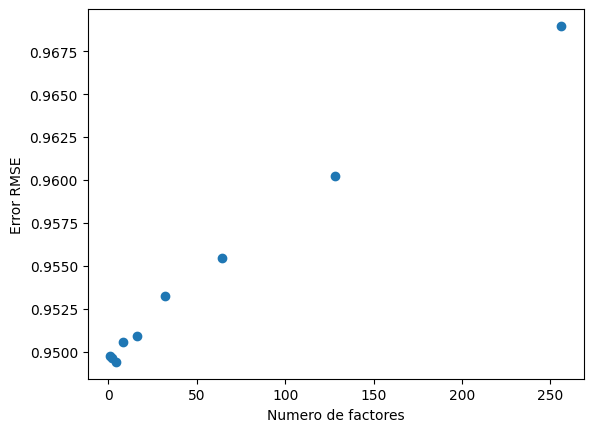

In [293]:
# Ploteamos desempeño según cantidad de factores de SVD

plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [294]:
param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

In [295]:
# Observamos performance del mejor modelo

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9441374573887252
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.02}


# Data Input

In [ ]:
# 1

def load_data(name):
    df = pd.read_csv(name, header = None, names = ['User','Rating'], usecols = [0,1])
    
    # En ciertos casos, forzar un tipo de dato hace que se ahorre mucho lugar en memoria.
    df['Rating'] = df['Rating']#.astype(float) 
    return df


df2 = load_data('../Datasets/Clase_08_RS/combined_data_2.txt')
print(df2.shape)

In [ ]:
# 2

movies_ids_df2 = df2.User[df2.Rating.isna()].values
print(movies_ids_df2)
print(len(movies_ids_df2))

movies_ids_df2 = np.arange(4500,len(movies_ids_df2) + 4500)
print(movies_ids_df2)

In [ ]:
df2_nan = pd.DataFrame(pd.isnull(df2.Rating))
df2_nan = df2_nan[df2_nan['Rating'] == True]
idx_movies_ids = df2_nan.index.values
print(idx_movies_ids)

In [ ]:
# Agregamos el índice de la última instancia del DataFrame

idx_movies_ids = np.append(idx_movies_ids,df2.shape[0])

In [ ]:
cantidad_criticas = np.diff(idx_movies_ids)
cantidad_criticas

In [ ]:
columna_movie_id = np.array([])
for i in range(cantidad_criticas.size):
    aux = np.full(cantidad_criticas[i], movies_ids_df2[i])
    columna_movie_id = np.concatenate((columna_movie_id, aux))

In [ ]:
df2['movie_id'] = columna_movie_id
del columna_movie_id

df2.dropna(inplace = True)
df2['User'] = df2['User'].astype(int)
df2['movie_id'] = df2['movie_id'].astype(np.int16)
df2['Rating'] = df2['Rating'].astype(np.int8)

gc.collect()